In [37]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)    #THIS LINE IS MOST IMPORTANT AS THIS WILL DISPLAY PLOT ON 
#NOTEBOOK WHILE KERNEL IS RUNNING

import numpy as np 
import pandas as pd
import plotly as py
import plotly.express as px
import plotly.graph_objs as go
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import lightgbm as lgb
from sklearn.metrics import roc_auc_score
import shap
from pandas_profiling import ProfileReport 

import warnings  
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('data/high_diamond_ranked_10min.csv')
df['blueWins'] = df['blueWins'].map({1: 'Blue Side', 0:'Red Side'})

isneg = []
for i in df.blueGoldDiff :
    if i < 0 :
        isneg.append(0)
    else :
        isneg.append(1)
df['blueGoldDiffSituation'] = isneg
isneg = []
for i in df.redGoldDiff :
    if i < 0 :
        isneg.append(0)
    else :
        isneg.append(1)
df['redGoldDiffSituation'] = isneg

isneg = []
for i in df.blueExperienceDiff :
    if i < 0 :
        isneg.append(0)
    else :
        isneg.append(1)
df['blueExperienceDiffSituation'] = isneg
isneg = []
for i in df.redExperienceDiff :
    if i < 0 :
        isneg.append(0)
    else :
        isneg.append(1)
df['redExperienceDiffSituation'] = isneg

In [3]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 44 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   gameId                        9879 non-null   int64  
 1   blueWins                      9879 non-null   object 
 2   blueWardsPlaced               9879 non-null   int64  
 3   blueWardsDestroyed            9879 non-null   int64  
 4   blueFirstBlood                9879 non-null   int64  
 5   blueKills                     9879 non-null   int64  
 6   blueDeaths                    9879 non-null   int64  
 7   blueAssists                   9879 non-null   int64  
 8   blueEliteMonsters             9879 non-null   int64  
 9   blueDragons                   9879 non-null   int64  
 10  blueHeralds                   9879 non-null   int64  
 11  blueTowersDestroyed           9879 non-null   int64  
 12  blueTotalGold                 9879 non-null   int64  
 13  blu

None

In [4]:
df.head()

gameId  blueWins  blueWardsPlaced  blueWardsDestroyed  blueFirstBlood  \
0  4519157822  Red Side               28                   2               1   
1  4523371949  Red Side               12                   1               0   
2  4521474530  Red Side               15                   0               0   
3  4524384067  Red Side               43                   1               0   
4  4436033771  Red Side               75                   4               0   

   blueKills  blueDeaths  blueAssists  blueEliteMonsters  blueDragons  ...  \
0          9           6           11                  0            0  ...   
1          5           5            5                  0            0  ...   
2          7          11            4                  1            1  ...   
3          4           5            5                  1            0  ...   
4          6           6            6                  0            0  ...   

   redTotalMinionsKilled  redTotalJungleMinionsKilled  redGoldDiff  \
0                    197                           55         -643   
1                    240                           52         2908   
2                    203                           28         1172   
3                    235                           47         1321   
4                    225                           67         1004   

   redExperienceDiff  redCSPerMin  redGoldPerMin  blueGoldDiffSituation  \
0                  8         19.7         1656.7                      1   
1               1173         24.0         1762.0                      0   
2               1033         20.3         1728.5                      0   
3                  7         23.5         1647.8                      0   
4               -230         22.5         1740.4                      0   

   redGoldDiffSituation  blueExperienceDiffSituation  \
0                     0                            0   
1                     1                            0   
2                     1                            0   
3                     1                            0   
4                     1                            1   

   redExperienceDiffSituation  
0                           1  
1                           1  
2                           1  
3                           1  
4                           0  

[5 rows x 44 columns]

In [5]:
#report_data = ProfileReport(df.sample(2000))
#report_data

In [6]:
color_discrete_map = {'Blue Side': 'rgb(122, 148, 231)', 'Red Side': 'rgb(255, 105, 97)'}

fig = px.histogram(df, x="blueWins",color = 'blueWins', color_discrete_map=color_discrete_map,
                  labels={
                     "blueWins": "Sides","count": "Wins",
                 },
                title="Total Wins per Side",
                hover_name="blueWins",       
                  )
# fig.show()
py.offline.iplot(fig)

In [7]:
color_discrete_map = {'Blue': 'rgb(122, 148, 231)', 'Red': 'rgb(255, 105, 97)'}

layout = go.Layout(
    yaxis=dict(
        range=[5, 45]
    ),
    xaxis=dict(
        range=[100, 200]
    )
)

tmp1 = df[['blueWardsPlaced', 'blueWardsDestroyed']].copy()
tmp1.columns = ['WardsPlaced','WardsDestroyed']
tmp1 = tmp1.astype(float)
tmp1['Side'] = 'Blue'
tmp2 = df[['redWardsPlaced', 'redWardsDestroyed']].copy()
tmp2.columns = ['WardsPlaced','WardsDestroyed']
tmp2 = tmp2.astype(float)
tmp2['Side'] = 'Red'
data = pd.concat([tmp1, tmp2], ignore_index = True).sample(2000)
data

fig1 = px.violin(data, y="WardsPlaced", color = 'Side',  box=True, points='all', color_discrete_map=color_discrete_map, title = 'Wards Placed per Side')
fig2 = px.violin(data, y="WardsPlaced", color = 'Side',  box=True, points='all', color_discrete_map=color_discrete_map, title = 'Wards Placed per Side Zoomed')
fig2.update_layout(
    yaxis=dict(
        range=[5, 45]
    )
)
fig1.show()
fig2.show()

In [8]:
fig1 = px.violin(data, y="WardsDestroyed", color = 'Side',  box=True, points='all', color_discrete_map=color_discrete_map, title = 'Wards Destroyed per Side')
fig2 = px.violin(data, y="WardsDestroyed", color = 'Side',  box=True, points='all', color_discrete_map=color_discrete_map, title = 'Wards Destroyed per Side Zoomed')
fig2.update_layout(
    yaxis=dict(
        range=[0, 10]
    )
)
fig1.show()
fig2.show()

In [9]:
color_discrete_map = {'Blue': 'rgb(122, 148, 231)', 'Red': 'rgb(255, 105, 97)'}

tmp1 = df[['blueFirstBlood']].copy()
tmp1.columns = ['FirstBloods']
tmp1 = tmp1.astype(float)
tmp1['Side'] = 'Blue'
tmp2 = df[['redFirstBlood']].copy()
tmp2.columns = ['FirstBloods']
tmp2 = tmp2.astype(float)
tmp2['Side'] = 'Red'
data = pd.concat([tmp1, tmp2])
data = data.groupby('Side').mean().reset_index()

fig = px.bar(data, x='Side', y='FirstBloods',color = 'Side', color_discrete_map=color_discrete_map, title = 'Mean First Bloods per Side')
fig.show()

In [10]:
col = ['blueKills','blueDeaths','blueAssists','redKills','redDeaths','redAssists']
tmp1 = df[col[0:3]].copy()
tmp1.columns = ['Kills','Death','Assistes']
tmp1['Side'] = 'Blue'
tmp2 = df[col[3:6]].copy()
tmp2.columns = ['Kills','Death','Assistes']
tmp2['Side'] = 'Red'

data = pd.concat([tmp1, tmp2], ignore_index = True)
data = data.groupby('Side').mean().reset_index()
data = pd.melt(data, id_vars=['Side'], value_vars=['Kills','Death','Assistes'])
data.columns = ['Side','KDA','Mean']

fig = px.bar(data, x="Side", y="Mean", color="Side", color_discrete_map=color_discrete_map,
             facet_col="KDA", title = 'Mean KDA per Side'
#              category_orders={"day": ["Thur", "Fri", "Sat", "Sun"],
#                               "time": ["Lunch", "Dinner"]}
            )
fig.show()

In [11]:
col = ['blueKills','blueDeaths','blueAssists','redKills','redDeaths','redAssists']
tmp1 = df[col[0:3]].copy()
tmp1.columns = ['Kills','Death','Assistes']
tmp1['Side'] = 'Blue'
tmp2 = df[col[3:6]].copy()
tmp2.columns = ['Kills','Death','Assistes']
tmp2['Side'] = 'Red'

data = pd.concat([tmp1, tmp2], ignore_index = True)
# data = data.groupby('Side').sum().reset_index()
data = pd.melt(data, id_vars=['Side'], value_vars=['Kills','Death','Assistes'])
data.columns = ['Side','KDA','Total']

fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=data[data['Side'] == 'Red']['KDA'], values=data[data['Side'] == 'Red']['Total'], name="Red Side"),
              1, 1)
fig.add_trace(go.Pie(labels=data[data['Side'] == 'Blue']['KDA'], values=data[data['Side'] == 'Blue']['Total'], name="Blue Side"),
              1, 2)

fig.update_traces(hole=.4, hoverinfo="label+percent+name+value")

fig.update_layout(
    title_text="KDA Proportion per Side",
    annotations=[dict(text='Red', x=0.18, y=0.5, font_size=20, showarrow=False),
                 dict(text='Blue', x=0.82, y=0.5, font_size=20, showarrow=False)])
fig.show()

In [12]:
col = ['blueEliteMonsters','blueDragons','blueHeralds','redEliteMonsters','redDragons','redHeralds']
tmp1 = df[col[0:3]].copy()
tmp1.columns = ['EliteMonsters','Dragons','Heralds']
tmp1['Side'] = 'Blue'
tmp2 = df[col[3:6]].copy()
tmp2.columns = ['EliteMonsters','Dragons','Heralds']
tmp2['Side'] = 'Red'

data = pd.concat([tmp1, tmp2], ignore_index = True)
data = data.groupby('Side').mean().reset_index()
data=pd.melt(data, id_vars=['Side'], value_vars=['EliteMonsters','Dragons','Heralds'])
data.columns = ['Side','NeutralGoals','Mean']

fig = px.bar(data, x="Side", y="Mean", color="Side", color_discrete_map=color_discrete_map,
             facet_col="NeutralGoals", title = 'Mean Neutral Goals per Side'
            )
fig.show()

In [13]:
col = ['blueTowersDestroyed', 'redTowersDestroyed']
tmp1 = df[col[0:1]].copy()
tmp1.columns = ['TowersDestroyed']
tmp1['Side'] = 'Blue'
tmp2 = df[col[1:2]].copy()
tmp2.columns = ['TowersDestroyed']
tmp2['Side'] = 'Red'

data = pd.concat([tmp1, tmp2], ignore_index = True)
data = data.groupby('Side').mean().reset_index()
data

fig = px.bar(data, x="Side", y="TowersDestroyed", color="Side", color_discrete_map=color_discrete_map,title = 'Mean Turrets Destroyed per Side'
            )
fig.show()

In [14]:
col = ['blueTotalGold', 'redTotalGold']
tmp1 = df[col[0:1]].copy()
tmp1.columns = ['TotalGold']
tmp1['Side'] = 'Blue'
tmp2 = df[col[1:2]].copy()
tmp2.columns = ['TotalGold']
tmp2['Side'] = 'Red'

data = pd.concat([tmp1, tmp2], ignore_index = True)
data = data.groupby('Side').mean().reset_index()


fig = px.bar(data, x="Side", y="TotalGold", color="Side", color_discrete_map=color_discrete_map,title = 'Mean Gold per Side'
            )
fig.show()

data = pd.concat([tmp1, tmp2], ignore_index = True)
data

fig1 = px.violin(data, y="TotalGold", color = 'Side',  box=True, points='all', color_discrete_map=color_discrete_map, title = 'Total Gold per Side Distribution')
fig1.show()

In [15]:
col = ['blueAvgLevel', 'redAvgLevel']
tmp1 = df[col[0:1]].copy()
tmp1.columns = ['AvgLevel']
tmp1['Side'] = 'Blue'
tmp2 = df[col[1:2]].copy()
tmp2.columns = ['AvgLevel']
tmp2['Side'] = 'Red'

data = pd.concat([tmp1, tmp2], ignore_index = True)
data = data.groupby('Side').mean().reset_index()


fig = px.bar(data, x="Side", y="AvgLevel", color="Side", color_discrete_map=color_discrete_map,title = 'Mean Level per Side'
            )
fig.show()


data = pd.concat([tmp1, tmp2], ignore_index = True).sample(2000)
data

fig1 = px.violin(data, y="AvgLevel", color = 'Side',  box=True, points='all', color_discrete_map=color_discrete_map, title = 'Level per Side Distribution')
fig1.show()

In [16]:
# blueTotalMinionsKilled

col = ['blueTotalMinionsKilled', 'redTotalMinionsKilled']
tmp1 = df[col[0:1]].copy()
tmp1.columns = ['TotalMinionsKilled']
tmp1['Side'] = 'Blue'
tmp2 = df[col[1:2]].copy()
tmp2.columns = ['TotalMinionsKilled']
tmp2['Side'] = 'Red'

data = pd.concat([tmp1, tmp2], ignore_index = True)
data = data.groupby('Side').mean().reset_index()


fig = px.bar(data, x="Side", y="TotalMinionsKilled", color="Side", color_discrete_map=color_discrete_map,title = 'Mean Minions Killede per Side'
            )
fig.show()


data = pd.concat([tmp1, tmp2], ignore_index = True).sample(2000)
data

fig1 = px.violin(data, y="TotalMinionsKilled", color = 'Side',  box=True, points='all', color_discrete_map=color_discrete_map, title = 'Total Minions Killed per Side Distribution')
fig1.show()

In [17]:
# blueTotalJungleMinionsKilled

col = ['blueTotalJungleMinionsKilled', 'redTotalJungleMinionsKilled']
tmp1 = df[col[0:1]].copy()
tmp1.columns = ['TotalJungleMinionsKilled']
tmp1['Side'] = 'Blue'
tmp2 = df[col[1:2]].copy()
tmp2.columns = ['TotalJungleMinionsKilled']
tmp2['Side'] = 'Red'

data = pd.concat([tmp1, tmp2], ignore_index = True)
data = data.groupby('Side').mean().reset_index()


fig = px.bar(data, x="Side", y="TotalJungleMinionsKilled", color="Side", color_discrete_map=color_discrete_map,title = 'Mean Jungle Minions Killed per Side'
            )
fig.show()


data = pd.concat([tmp1, tmp2], ignore_index = True).sample(2000)
data

fig1 = px.violin(data, y="TotalJungleMinionsKilled", color = 'Side',  box=True, points='all', color_discrete_map=color_discrete_map, title = 'Total Jungle Minions Killed per Side Distribution')
fig1.show()

In [18]:
# blueGoldDiff

col = ['blueGoldDiff', 'redGoldDiff']
tmp1 = df[col[0:1]].copy()
tmp1.columns = ['GoldDiff']
tmp1['Side'] = 'Blue'
tmp2 = df[col[1:2]].copy()
tmp2.columns = ['GoldDiff']
tmp2['Side'] = 'Red'

data = pd.concat([tmp1, tmp2], ignore_index = True)
data = data.groupby('Side').mean().reset_index()

fig = px.bar(data, x="Side", y="GoldDiff", color="Side", color_discrete_map=color_discrete_map, title = 'Mean Gold Diff per Side'
            )
fig.show()


data = pd.concat([tmp1, tmp2], ignore_index = True).sample(2000)
data

fig1 = px.violin(data, y="GoldDiff", color = 'Side',  box=True, points='all', color_discrete_map=color_discrete_map, title = 'Gold Diff per Side Distribution')
fig1.show()

In [19]:
# blueExperienceDiff

col = ['blueExperienceDiff', 'redExperienceDiff']
tmp1 = df[col[0:1]].copy()
tmp1.columns = ['ExperienceDiff']
tmp1['Side'] = 'Blue'
tmp2 = df[col[1:2]].copy()
tmp2.columns = ['ExperienceDiff']
tmp2['Side'] = 'Red'

data = pd.concat([tmp1, tmp2], ignore_index = True)
data = data.groupby('Side').mean().reset_index()

fig = px.bar(data, x="Side", y="ExperienceDiff", color="Side", color_discrete_map=color_discrete_map, title = 'Mean Experience Difference per Side'
            )
fig.show()


data = pd.concat([tmp1, tmp2], ignore_index = True).sample(2000)
data

fig1 = px.violin(data, y="ExperienceDiff", color = 'Side',  box=True, points='all', color_discrete_map=color_discrete_map, title = 'Experience Difference per Side Distribution')
fig1.show()

In [20]:
# blueCSPerMin	

col = ['blueCSPerMin', 'redCSPerMin']
tmp1 = df[col[0:1]].copy()
tmp1.columns = ['CSPerMin']
tmp1['Side'] = 'Blue'
tmp2 = df[col[1:2]].copy()
tmp2.columns = ['CSPerMin']
tmp2['Side'] = 'Red'

data = pd.concat([tmp1, tmp2], ignore_index = True)
data = data.groupby('Side').mean().reset_index()

fig = px.bar(data, x="Side", y="CSPerMin", color="Side", color_discrete_map=color_discrete_map, title = 'Mean CS Per Min per Side'
            )
fig.show()


data = pd.concat([tmp1, tmp2], ignore_index = True).sample(2000)
data

fig1 = px.violin(data, y="CSPerMin", color = 'Side',  box=True, points='all', color_discrete_map=color_discrete_map, title = 'CS Per Min per Side Distribution')
fig1.show()

In [21]:
# blueGoldPerMin

col = ['blueGoldPerMin', 'redGoldPerMin']
tmp1 = df[col[0:1]].copy()
tmp1.columns = ['GoldPerMin']
tmp1['Side'] = 'Blue'
tmp2 = df[col[1:2]].copy()
tmp2.columns = ['GoldPerMin']
tmp2['Side'] = 'Red'

data = pd.concat([tmp1, tmp2], ignore_index = True)
data = data.groupby('Side').mean().reset_index()

fig = px.bar(data, x="Side", y="GoldPerMin", color="Side", color_discrete_map=color_discrete_map, title = 'Mean Gold Per Min per Side'
            )
fig.show()


data = pd.concat([tmp1, tmp2], ignore_index = True).sample(2000)
data

fig1 = px.violin(data, y="GoldPerMin", color = 'Side',  box=True, points='all', color_discrete_map=color_discrete_map, title = 'Gold Per Min per Side Distribution')
fig1.show()

Text(0.5, 1.0, 'Blue Side Features Correlation')

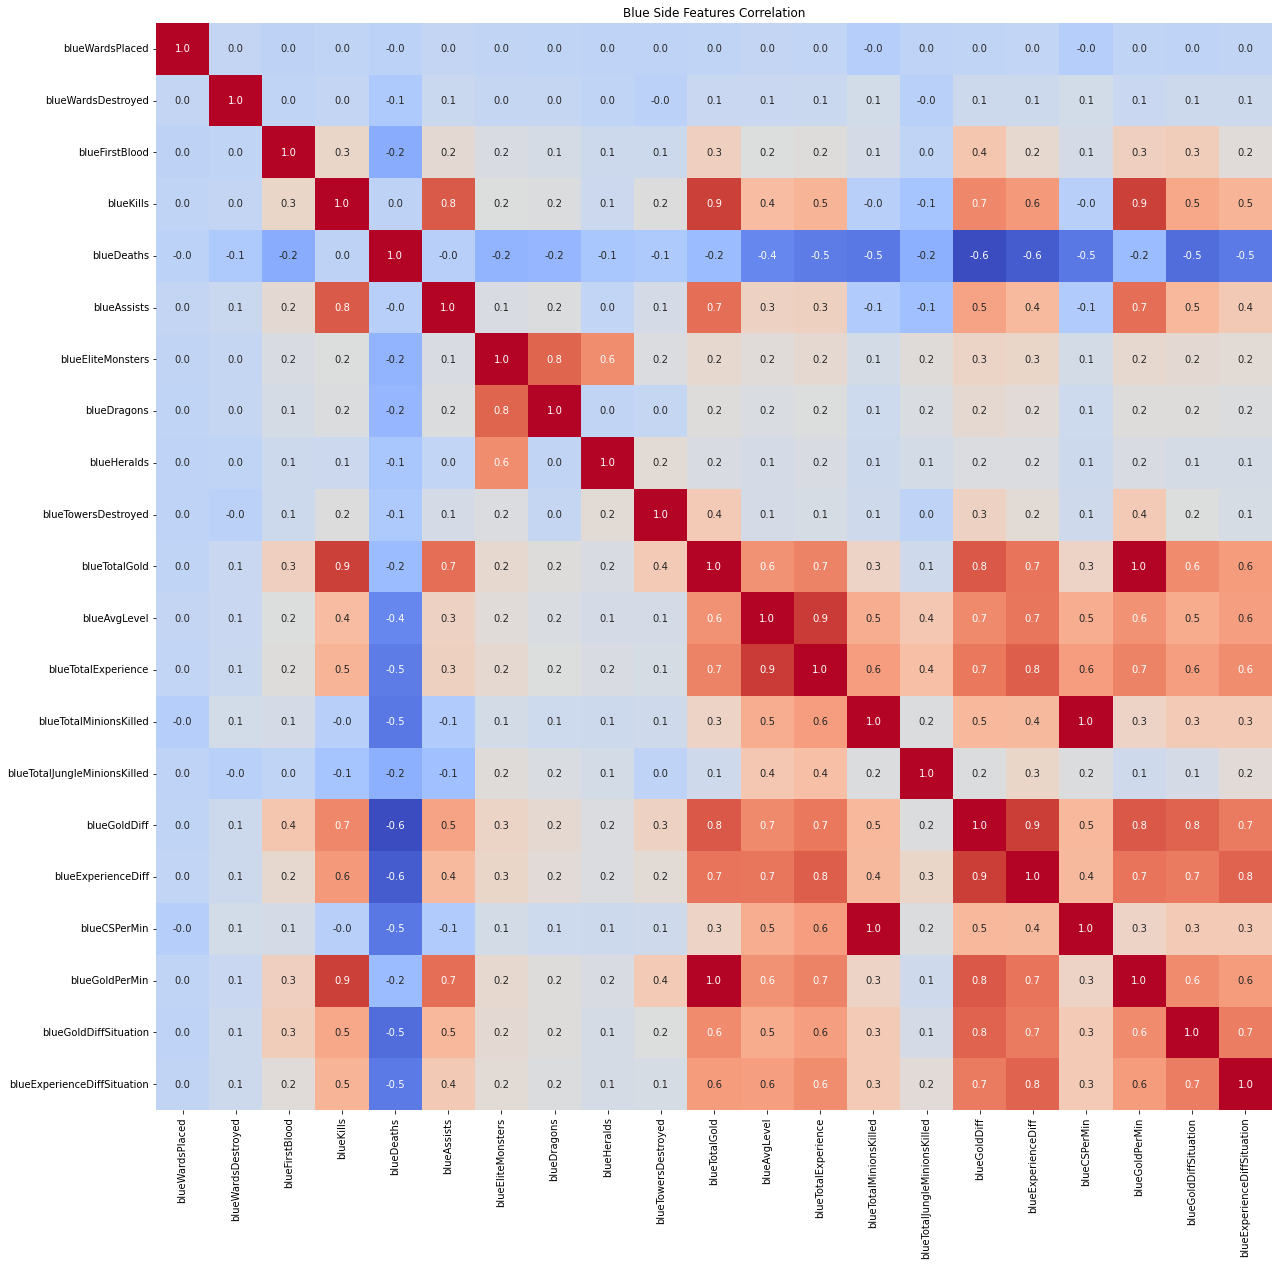

In [22]:
corr = df[[col for col in df.columns if 'blue' in col and col != 'blueWins']].corr()
f,ax = plt.subplots(figsize=(20, 20))
p = sns.heatmap(corr,
                cmap='coolwarm',
                annot=True,
                fmt=".1f",
                annot_kws={'size':10},
                cbar=False,
                ax=ax)
p.set_title('Blue Side Features Correlation')

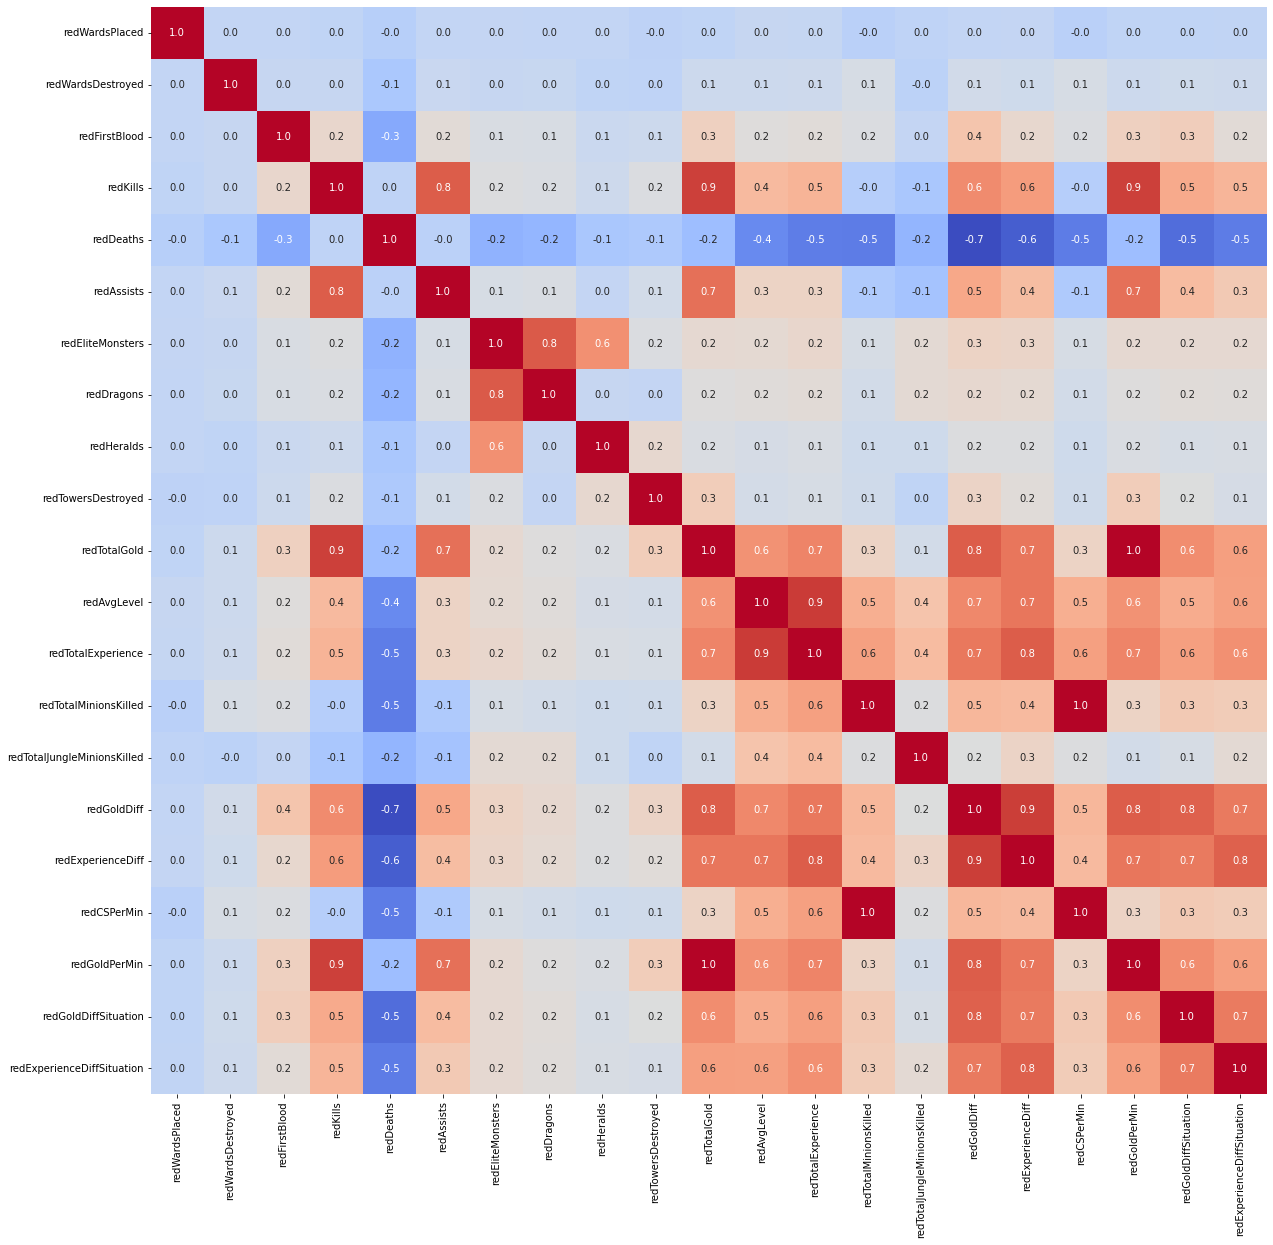

In [23]:
corr = df[[col for col in df.columns if 'red' in col and col != 'blueWins']].corr()
f,ax = plt.subplots(figsize=(20, 20))
p = sns.heatmap(corr,
                cmap='coolwarm',
                annot=True,
                fmt=".1f",
                annot_kws={'size':10},
                cbar=False,
                ax=ax)

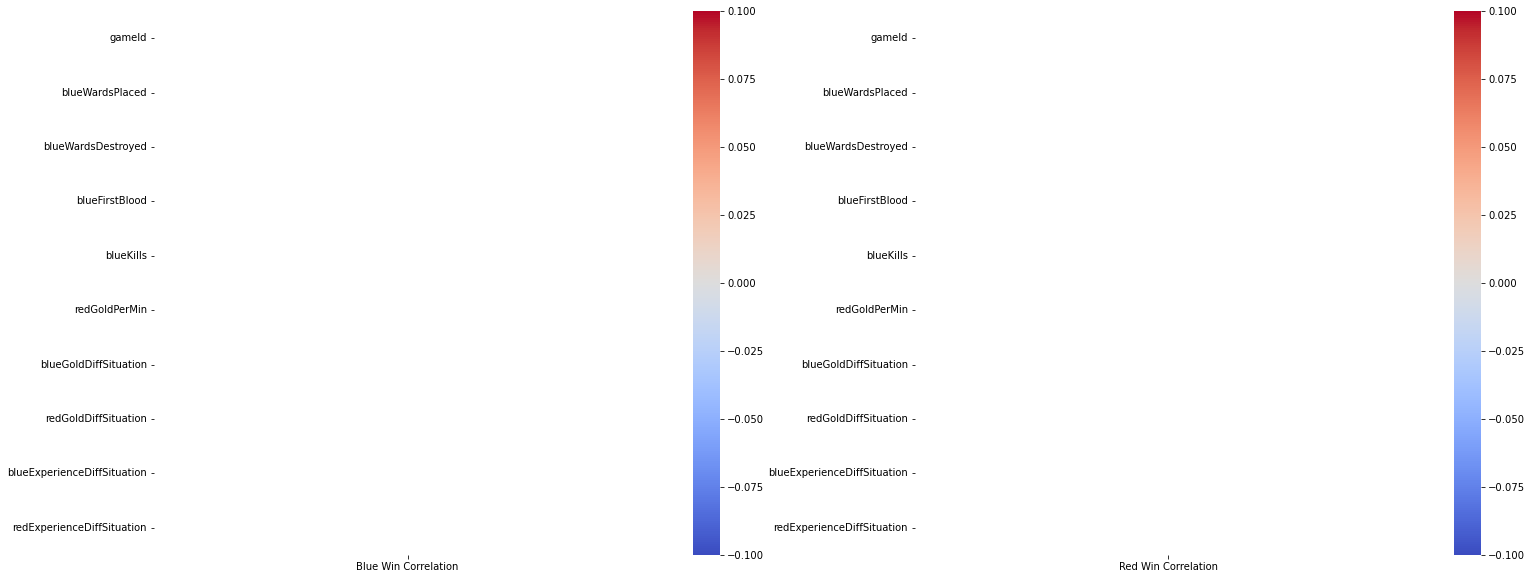

<Figure size 432x432 with 0 Axes>

In [25]:
df['blueWins'] = df['blueWins'].map({'Blue Side': 1, 'Red Side': 0})

blue_win = df[[col for col in df.columns if col != 'blueWins']].corrwith(df['blueWins']).to_frame().sort_values(by = 0, ascending = False)
blue_win = pd.concat([blue_win.head(5), blue_win.tail(5)])
blue_win.columns = ['Blue Win Correlation']
blue_win

red_win = df[[col for col in df.columns if col != 'blueWins']].corrwith(df['blueWins'].map({0:1, 1:0})).to_frame().sort_values(by = 0, ascending = False)
red_win = pd.concat([red_win.head(5), red_win.tail(5)])
red_win.columns = ['Red Win Correlation']
red_win

fig = plt.figure(figsize=(25,10))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

plt.figure(figsize=(6,6))

sns.heatmap(blue_win,
            vmin=-1,
            cmap='coolwarm',
            annot=True,
           ax = ax1);

sns.heatmap(red_win,
            vmin=-1,
            cmap='coolwarm',
            annot=True,
           ax = ax2);

In [27]:
X = df.drop(['blueWins', 'gameId'], axis=1)
y = df.blueWins

In [46]:
opt_params = {'num_leaves': (24, 45), 'feature_fraction': (0.1, 0.9),'bagging_fraction': (0.8, 1),'max_depth': (5, 8.99),'lambda_l1': (0, 5),'lambda_l2': (0, 3),'min_split_gain': (0.001, 0.1),'min_child_weight': (5, 50)}

In [48]:
params = opt_params
params["num_leaves"] = int(round(params['num_leaves']))
params['feature_fraction'] = max(min(params['feature_fraction'], 1), 0)
params['bagging_fraction'] = max(min(params['bagging_fraction'], 1), 0)
params['max_depth'] = int(round(params['max_depth']))
params['lambda_l1'] = max(params['lambda_l1'], 0)
params['lambda_l2'] = max(params['lambda_l2'], 0)
params['min_split_gain'] = max(params['min_split_gain'], 0)
params['min_child_weight'] = max(params['min_child_weight'], 0)
params['num_iterations'] = int(round(10000))
params['learning_rate'] = max(0.05, 0)
params['application'] = 'binary'
params['metric'] = 'auc'
params['objective'] = 'binary'

TypeError: type tuple doesn't define __round__ method

In [ ]:
train_data = lgb.Dataset(data=X, label=y, free_raw_data=True, feature_name = [col for col in df.columns if col!= 'gameId' and col!= 'blueWins'])
model = lgb.train(params, train_data)

In [ ]:
ax = lgb.plot_importance(model, max_num_features=10, figsize = (15,15))
plt.show()

In [ ]:
pred = np.round(model.predict(X)).astype(int)
data_test = TSNE(n_components=3).fit_transform(X)

In [ ]:
predicted = pd.DataFrame(data_test)
predicted['output'] = pred
predicted['output'] = predicted['output'].astype(object)
predicted['output'] = predicted['output'].map({0: "Red Wins",1: "Blue Wins"})
predicted['flag'] = 'predicted'
predicted.columns = ['dim_1','dim_2','dim_3','output', 'flag']

real = pd.DataFrame(data_test)
real['output'] = y.values
real['output'] = real['output'].astype(object)
real['output'] = real['output'].map({0: "Red Wins",1: "Blue Wins"})
real['flag'] = 'real'
real.columns = ['dim_1','dim_2','dim_3','output', 'flag']

data_3d = pd.concat([predicted,real], ignore_index = True).sample(4000)

In [ ]:
color_discrete_map = {"Blue Wins": 'rgb(122, 148, 231)', "Red Wins": 'rgb(255, 105, 97)'}

fig1 = px.scatter_3d(predicted, x='dim_1', y='dim_2', z='dim_3', color_discrete_map=color_discrete_map,color='output', title = 'How Model Distinct Wins and Loses')
fig2 = px.scatter_3d(real, x='dim_1', y='dim_2', z='dim_3',color_discrete_map=color_discrete_map,color='output', title = 'Real Distinction Between Wins and Loses')

fig1.show()
fig2.show()